### Credit score classification

Given a person's credit information, we will create a machine learning model that can classify the credit score. To achieve our goal we will use supervised classification models, where we will evaluate the results to solve the problem and achieve the objective.

The credit score is usually based on five factors:

- 35% of the score weighs on payment history.
- 30% of this is the amount owed.
- The age of the credit history represents 15%.
- The credit classification varied by 10%.
- The remaining 10% is current activity



[FICO® Scores](https://www.myfico.com/credit-education/whats-in-your-credit-score#:~:text=FICO%20Scores%20are%20calculated%20using,and%20credit%20mix%20(10%25).)

FICO Scores are calculated using many different pieces of credit data in your credit report. This data is grouped into five categories: payment history (35%), amounts owed (30%), length of credit history (15%), new credit (10%) and credit mix (10%).


In [373]:
# all the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

Read the data from 'train.csv'

In [374]:
df = pd.read_csv('../Data/train.csv',low_memory=False)

#### DATA 

Age”: represents the age of the clients.

“Occupation”: represents the client's profession.

“Annual_Income”: annual income of the client.

“Monthly_Inhand_Salary”: monthly net salary of the client.

“Num_Bank_Accounts”: number of bank accounts that the client has.

“Num_Credit_Card”: number of credit cards that a client has.

“Type_of_Loan”: represents the types of loans that clients have.

“Num_of_Loan”: represents the amount of loans acquired by the client.

“Delay_from_due_date”: represents the average number of days of delay of the payment date (Days).

“Num_of_Delayed_Payment”: represents the average number of late payments for a person.

“Changed_Credit_Limit”: Represents the percentage increase in the credit card limit.

“Num_Credit_Inquiries”: represents the number of credit card inquiries.

“Credit_Mix”: represents the classification of varied credit (Bad, Standard, Good).

“Outstanding_Debt”: represents the remaining total of the client's debts to pay.

“Credit_Utilization_Ratio”: The credit card utilization ratio.

“Credit_History_Age”: represents the age of a person's credit history (Days).

“Payment_of_Min_Amount”: represents if the person only paid the minimum.

“Total_EMI_per_month”: represents the equivalent monthly installment (EMI:equated monthly installment).

“Amount_invested_monthly”: amount of money invested monthly.

“Payment_Behaviour”: represents the customer's payment habits.

“Monthly_Balance”: The client's monthly balance.

“Credit_Score”: Represents credit score support (Poor, Standard, Good).

### EDA

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [376]:
df.head(3).T

,0,1,2
ID,0x1602,0x1603,0x1604
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500
SSN,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN
Num_Bank_Accounts,3,3,3


In [377]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [378]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Variables with the incorrect format that need to be fixed.

We can observe erroneous data in potential variables to correct.

We found null data that we would have to handle.

Features that are not relevant to our analysis.

We need to analyze the outliers in the numerical variables

In [379]:
# Every customer is assinged a customer id. we will use that customer id to match them and find the names for all the missing Name
print(f'Num of unique ID:{df["Customer_ID"].nunique()}')
print(f'Num of unique Name:{df["Name"].nunique()}')
df.groupby('Customer_ID')['Name'].count()

Num of unique ID:12500
Num of unique Name:10139


Customer_ID
CUS_0x1000    7
CUS_0x1009    8
CUS_0x100b    7
CUS_0x1011    8
CUS_0x1013    8
             ..
CUS_0xff3     6
CUS_0xff4     7
CUS_0xff6     8
CUS_0xffc     8
CUS_0xffd     7
Name: Name, Length: 12500, dtype: int64

*** Note: in future name customer id etc will not be used to build the model, they are mostly for referance ***

In [380]:
df['Name'] = df.groupby('Customer_ID')['Name'].transform(lambda name: name.mode()[0]).astype("category") 

In [381]:
df[df['Customer_ID']=='CUS_0x1000'].T

,56752,56753,56754,56755,56756,56757,56758,56759
ID,0x1628a,0x1628b,0x1628c,0x1628d,0x1628e,0x1628f,0x16290,0x16291
Customer_ID,CUS_0x1000,CUS_0x1000,CUS_0x1000,CUS_0x1000,CUS_0x1000,CUS_0x1000,CUS_0x1000,CUS_0x1000
Month,January,February,March,April,May,June,July,August
Name,Alistair Barrf,Alistair Barrf,Alistair Barrf,Alistair Barrf,Alistair Barrf,Alistair Barrf,Alistair Barrf,Alistair Barrf
Age,17,17,17_,17,17,18,18,18
SSN,913-74-1218,913-74-1218,913-74-1218,913-74-1218,913-74-1218,913-74-1218,913-74-1218,913-74-1218
Occupation,Lawyer,Lawyer,Lawyer,Lawyer,Lawyer,Lawyer,Lawyer,Lawyer
Annual_Income,30625.94,30625.94,30625.94_,30625.94,30625.94,30625.94,30625.94,30625.94
Monthly_Inhand_Salary,2706.161667,NaN,2706.161667,2706.161667,2706.161667,2706.161667,2706.161667,2706.161667
Num_Bank_Accounts,6,6,6,6,6,6,6,6


In [382]:
# Age
print(df['Age'].describe())
df['Age'] = df['Age'].str.replace(r'[_\s-]', '', regex=True)
df['Age']=df['Age'].astype('float')

count     100000
unique      1788
top           38
freq        2833
Name: Age, dtype: object


In [383]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
    sns.histplot(data=df, x=column_name, bins=30, kde=True, color='skyblue', edgecolor='black')  # Adding edgecolor for better visibility
    plt.title('Distribution of ' + column_name, fontsize=16, fontweight='bold')  # Increase font size and add bold
    plt.xlabel(column_name, fontsize=12)  # Increase font size
    plt.ylabel('Frequency', fontsize=12)  # Increase font size
    plt.grid(True, linestyle='--', alpha=0.6)  # Add gridlines with some transparency
    plt.tick_params(axis='both', which='major', labelsize=10)  # Adjust tick label size
    sns.despine()  # Remove the top and right spines
    plt.show()

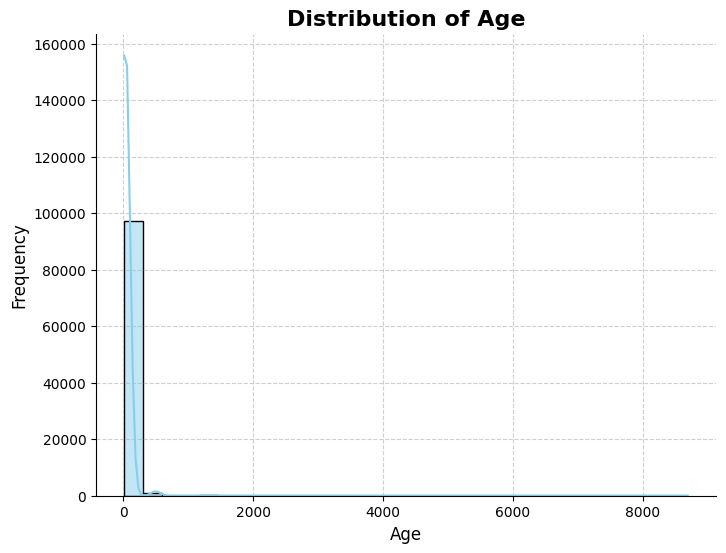

In [384]:
plot_distribution(df,'Age')

In [385]:
df['Age'] = df['Age'].apply(lambda x: np.NaN if x<0 or x>100 else x)

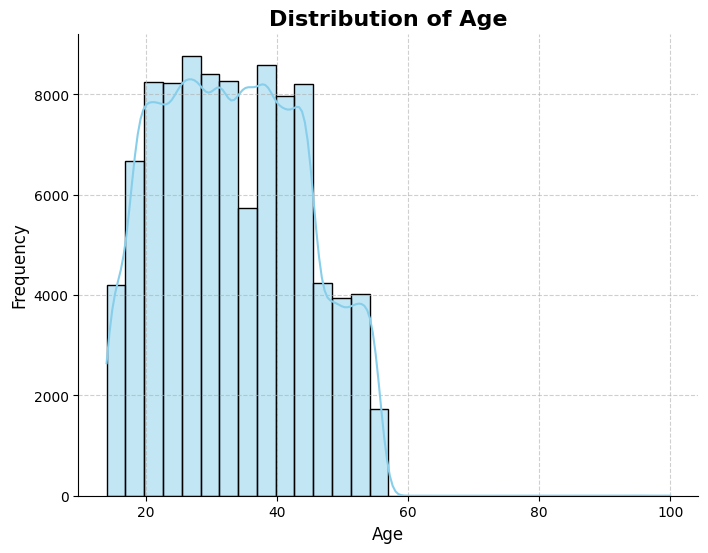

In [386]:
plot_distribution(df,'Age')

In [387]:
print(df['Age'].describe())
mode_age = df['Age'].mode()
print(f'Mode {mode_age[0]}')

count    97224.000000
mean        33.323274
std         10.778909
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max        100.000000
Name: Age, dtype: float64
Mode 38.0


Since we already dropped our outliears we can use mean to fill in our NaN

In [388]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age'].isna().sum()

0

In [389]:
def plot_sum_of_numarical_col_by_credit_score(col):
    sum__by_credit_score = df.groupby('Credit_Score')[col].sum().reset_index()
    plt.figure(figsize=(5, 3))
    sns.barplot(x='Credit_Score', y=col, data=sum__by_credit_score, palette='viridis', width=.5)
    plt.title(f'Sum {col} by Credit Score')
    plt.xlabel('Credit Score')
    plt.ylabel(f'Sum {col}')
    plt.show()

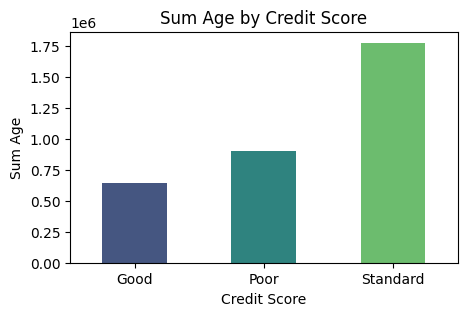

In [390]:
plot_sum_of_numarical_col_by_credit_score('Age')

In [391]:
# Occupation
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [392]:
df['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

We will label all the rows who has '_______' to 'Unknown'

In [393]:
df.loc[df['Occupation'] == '_______', 'Occupation'] = 'Unknown'

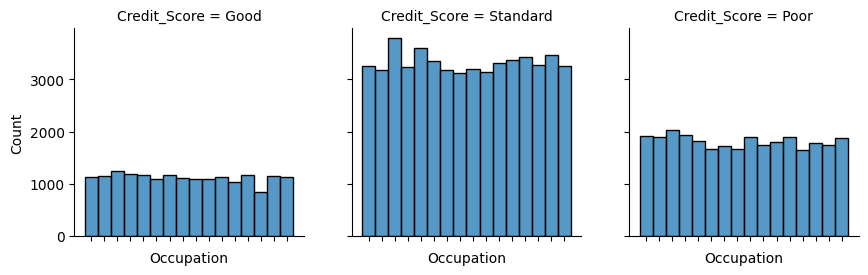

In [394]:
Occupation = sns.FacetGrid(df, col='Credit_Score', height=3, aspect=1)
Occupation.map(sns.histplot, 'Occupation')
Occupation.set(xticklabels=[])
plt.show()

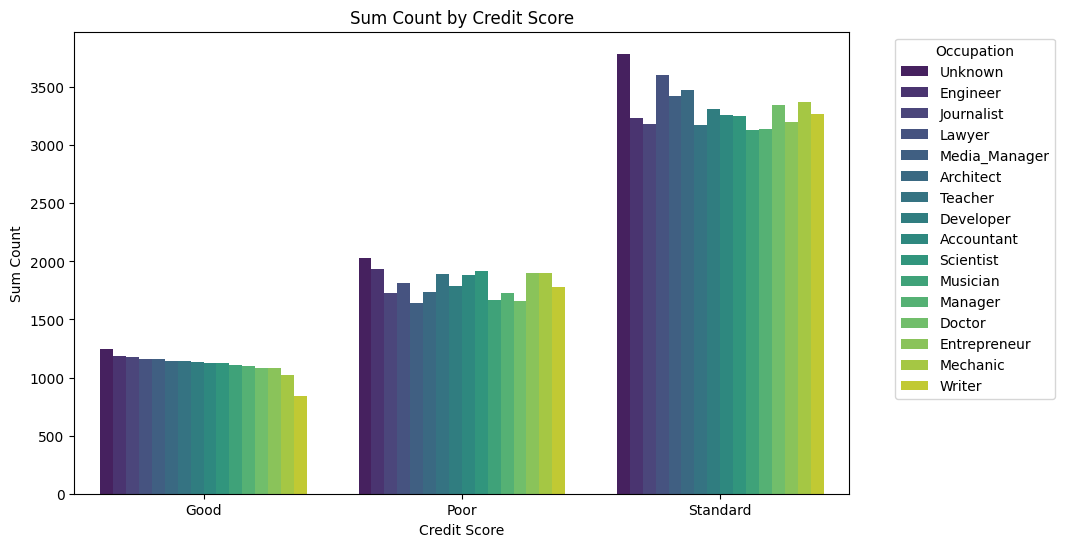

In [395]:
def plot_sum_of_object_col_by_credit_score(col):
    sum_by_credit_score = df.groupby('Credit_Score')[col].value_counts().reset_index(name='Count')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Credit_Score', y='Count', hue=col, data=sum_by_credit_score, palette='viridis')
    plt.title(f'Sum Count by Credit Score')
    plt.xlabel('Credit Score')
    plt.ylabel(f'Sum Count')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_sum_of_object_col_by_credit_score('Occupation')

In [396]:
sum_by_credit_score = df.groupby('Credit_Score')['Occupation'].value_counts().reset_index()
sum_by_credit_score

,Credit_Score,Occupation,count
0,Good,Unknown,1243
1,Good,Engineer,1182
2,Good,Journalist,1173
3,Good,Lawyer,1162
4,Good,Media_Manager,1161
5,Good,Architect,1144
6,Good,Teacher,1143
7,Good,Developer,1134
8,Good,Accountant,1128
9,Good,Scientist,1127


In [397]:
# Annual_Income

In [398]:
df['Annual_Income'].describe()

count       100000
unique       18940
top       36585.12
freq            16
Name: Annual_Income, dtype: object

In [399]:
df['Annual_Income'] = df['Annual_Income'].str.replace(r'[_\s-]', '', regex=True)
df['Annual_Income']=df['Annual_Income'].astype('float')

In [400]:
df['Annual_Income'].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

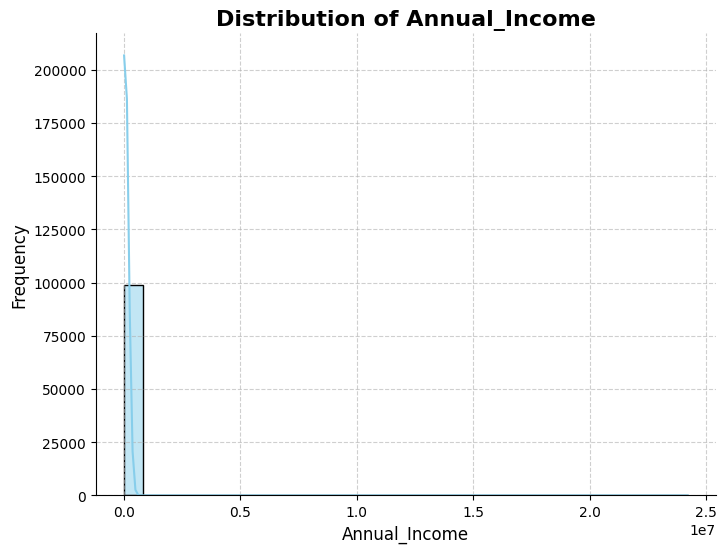

In [401]:
plot_distribution(df,'Annual_Income')

In [402]:
# for now we will keep them
df[df['Annual_Income'] > 500000].sort_values(by='Annual_Income')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
50458,0x13da8,CUS_0xb798,March,Karlk,52.0,908-32-4592,Mechanic,578236.0,3798.059167,5,...,_,208.05,33.083036,NaN,No,0.000000,261.26060934021734,High_spent_Small_value_payments,378.54530732644935,Standard
50471,0x13db9,CUS_0xb450,August,Wayner,47.0,564-78-6008,Entrepreneur,580744.0,2911.420833,1,...,Good,1365.41,26.641453,25 Years and 5 Months,No,15.805627,46.42576437523685,High_spent_Medium_value_payments,478.91069242686564,Good
245,0x176f,CUS_0x9a71,June,Mukhopadhyayc,55.0,889-07-2357,Scientist,586359.0,1684.168333,1,...,Good,413.32,28.836349,18 Years and 8 Months,No,29.534584,68.95672493704708,High_spent_Medium_value_payments,319.9255246757902,Good
79379,0x1e71d,CUS_0x2b2b,April,Mennc,23.0,216-65-5815,Scientist,649977.0,1115.160000,8,...,Bad,4555.49,32.607965,13 Years and 6 Months,Yes,72.924860,112.2464402080887,Low_spent_Small_value_payments,216.34469986251557,Standard
17619,0x7d3d,CUS_0x4127,April,ars,41.0,#F%$D@*&8,Unknown,661208.0,10707.713333,5,...,Standard,386.67,42.366780,27 Years and 2 Months,Yes,80.374790,153.58199620715402,High_spent_Medium_value_payments,1086.8145468425405,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27262,0xb5bc,CUS_0x1a23,July,Paige Gancec,51.0,092-81-2077,Lawyer,24105369.0,3165.787500,3,...,Good,671.94,29.621716,31 Years and 4 Months,No,57.514937,237.62297662779355,Low_spent_Medium_value_payments,301.4408366481539,Standard
14588,0x6b7a,CUS_0x6cad,May,Mattl,38.0,#F%$D@*&8,Teacher,24160009.0,3852.982500,10,...,Bad,3148.34,25.225734,12 Years and 11 Months,Yes,196.888046,159.59397181813247,High_spent_Medium_value_payments,278.81623233206835,Standard
59059,0x1700d,CUS_0x5b6f,April,Forgionej,21.0,054-49-7239,Mechanic,24177153.0,2373.828333,4,...,Good,1443.42,39.408584,21 Years and 2 Months,No,0.000000,136.17554240661272,Low_spent_Medium_value_payments,381.20729092672065,Standard
7814,0x43c8,CUS_0xb1a0,July,Wachtelm,17.0,249-90-4145,Lawyer,24188807.0,1067.655833,8,...,_,3703.96,41.268945,10 Years and 1 Months,NM,87.323423,25.385696011834174,High_spent_Small_value_payments,254.05646414690938,Standard


In [403]:
# here we will use the mode to avoid outlier 
df['Annual_Income']=df.groupby('Customer_ID')['Annual_Income'].transform(lambda Annual_Income: Annual_Income.mode()[0])

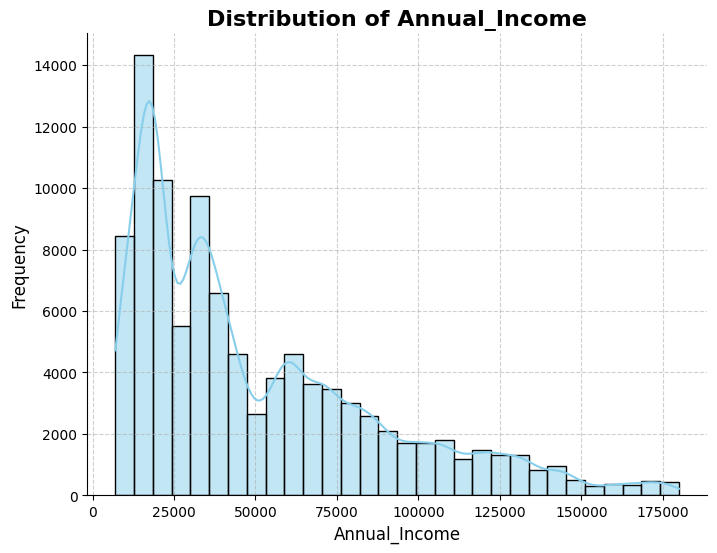

In [404]:
plot_distribution(df,'Annual_Income')

In [405]:
# Monthly_Inhand_Salary
df['Monthly_Inhand_Salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Monthly_Inhand_Salary
Non-Null Count  Dtype  
--------------  -----  
84998 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [406]:
df['Monthly_Inhand_Salary'].nunique()

13235

In [407]:
# In this case we will do the same as beore, group by customer id then we can fill the NaN using mode
df['Monthly_Inhand_Salary']=df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda Monthly_Inhand_Salary: Monthly_Inhand_Salary.mode()[0])

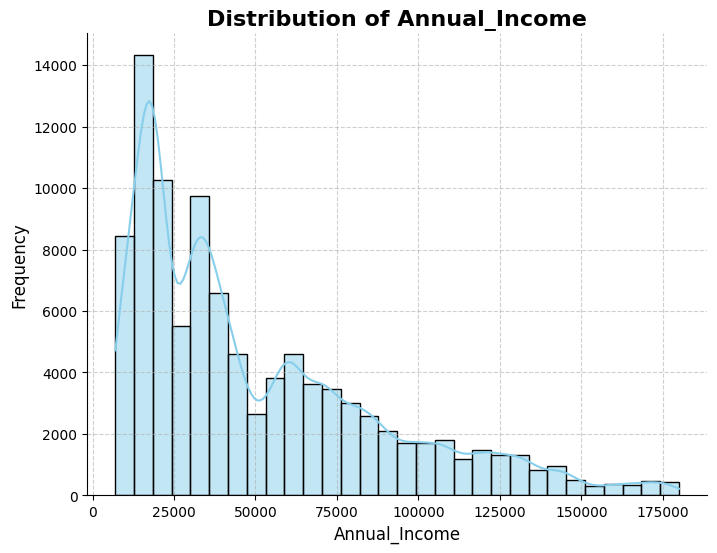

In [408]:
plot_distribution(df,'Annual_Income')

Num_Bank_Accounts describe:
count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64
Before using mode: 


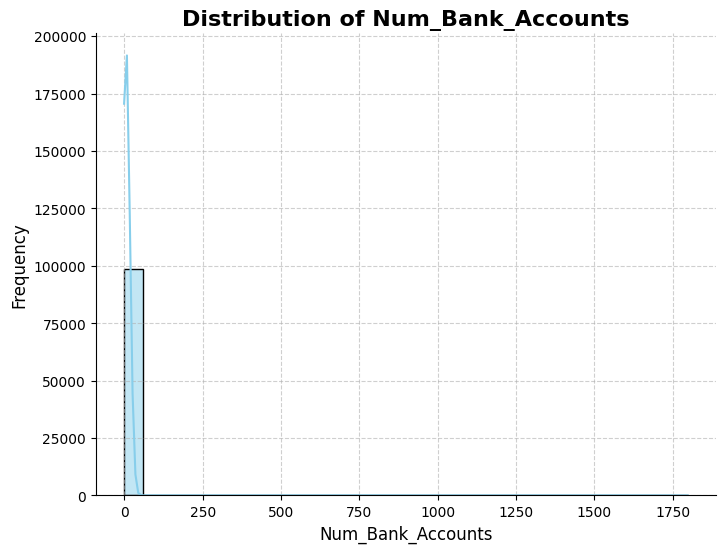

After using mode to adjust outlier: 


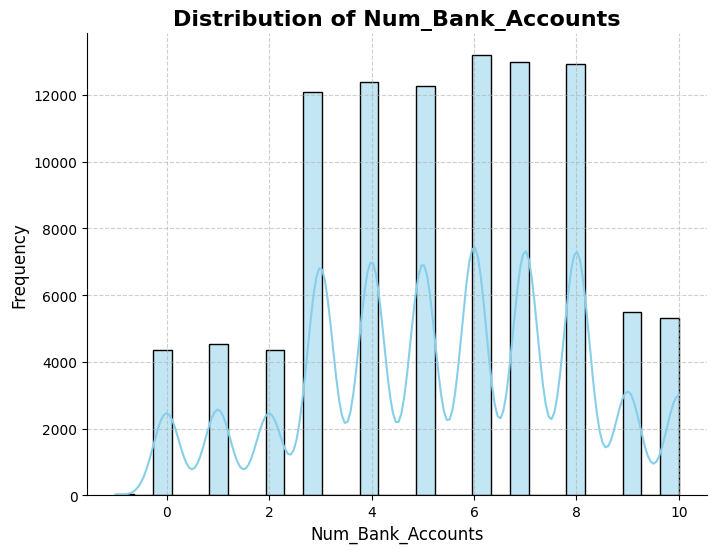

Num_Credit_Card describe:
count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64
Before using mode: 


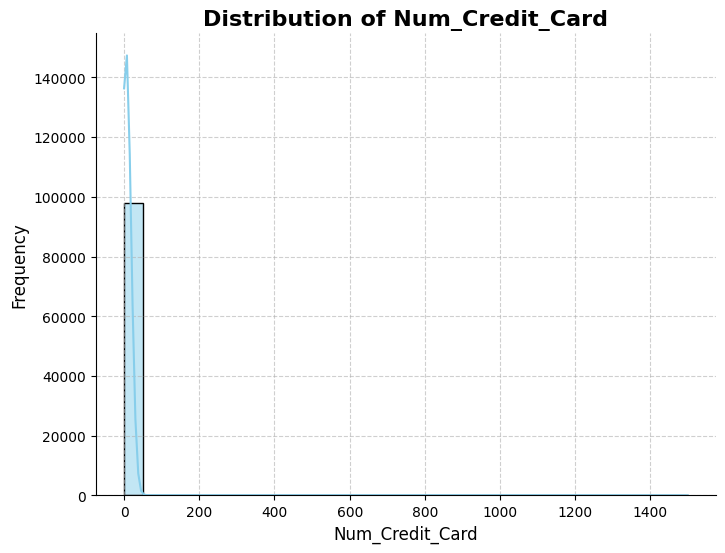

After using mode to adjust outlier: 


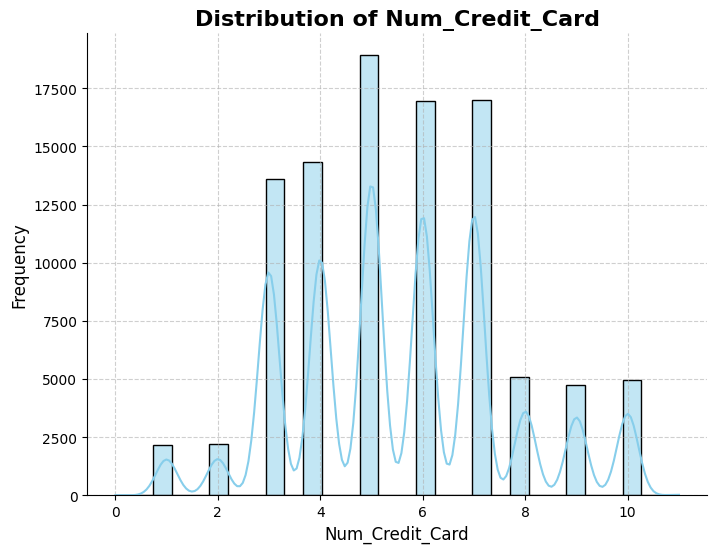

Interest_Rate describe:
count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64
Before using mode: 


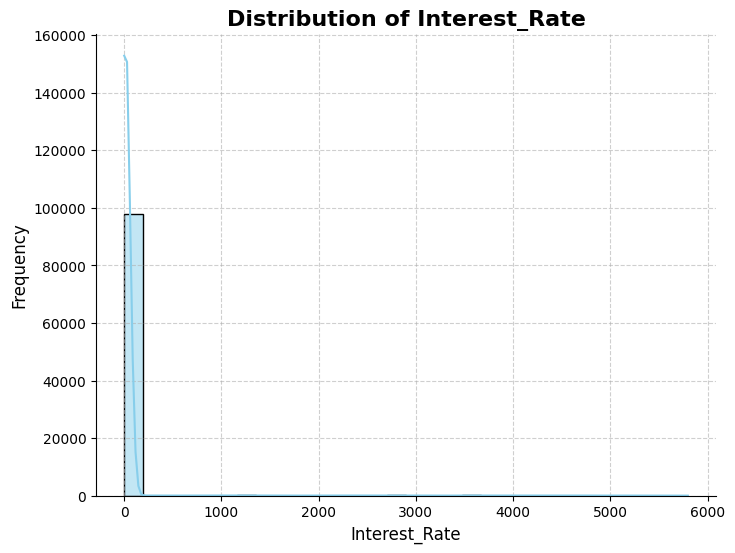

After using mode to adjust outlier: 


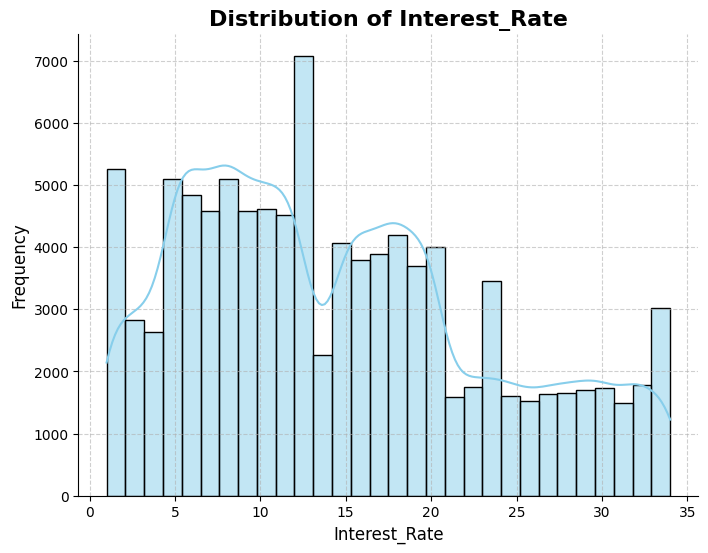

In [409]:
# Num_Bank_Accounts, Num_Credit_Card and Interest_Rate
# We will write a funtion to analyze this 3 togther since they are same data type

def EDA_Num_Bank_Accounts_Num_Credit_Card_Interest_Rate(col):
    print(col + ' describe:')
    print(df[col].describe())
    print("Before using mode: ")
    plot_distribution(df, col)
    df[col] = df.groupby('Customer_ID')[col].transform(lambda x: x.mode()[0])
    print("After using mode to adjust outlier: ")
    plot_distribution(df, col)

columns = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
for col in columns:
    EDA_Num_Bank_Accounts_Num_Credit_Card_Interest_Rate(col)